Dynamics Lecture 1 (10/02/2020)

The main subject of the Python assignment in the first week is forward Euler integration, which is one of the many ways to numerically integrate any random function. Numerical methods play a big role in engineering since computers are only capable of numerical solving. The main advantage of numerical methods over analytical integration is that solving even very complex functions can be done very easily. Examples of this include simulating a double pendulum (for which the equation will be listed below). Numerical integration allows to skip the step of actually solving the integral and moves straight on to building understanding. It goes without saying that this is invaluable in dynamics problem since complexer system generally have no known analytical solution.

$\dot{\theta}_2 = \frac{6}{ml^2} \frac{2p_{\theta_2} - 3\cos(\theta_1 - \theta_2)p_{\theta_1}}{16-9\cos^2(\theta_1 - \theta_2)}$ 

$\dot{p}_{\theta_{2}} = \frac{\partial L}{\partial \theta_2} = -\frac{1}{2}ml^2(-\dot{\theta}_1\dot{\theta}_2 \, \sin(\theta_1 - \theta_2) + \frac{g}{l}\sin(\theta_2)$

In [61]:
import math, time, sys, os
import numpy as np
import matplotlib.pyplot as plt

The following code will deal with a basic problem involving a ball being thrown straight up into the air. The problem will be solved twice. Once with an analytical method, and once with a numerical method. These will then be compared to judge the accuracy of the forward Euler integration.

In [62]:
# Declaring all the relevant variables
y0 = 0
v0 = 40
g = 9.81
t0 = 0
t1 = 10
dt = 0.1

t = np.linspace(t0, t1, 1 + round((t1-t0)/dt))
y_an = np.zeros(len(t))  
v_an = np.zeros(len(t))

y_num = np.zeros(len(t))  
v_num = np.zeros(len(t))
y_num[0] = y0  #initial position 
v_num[0] = v0  #initial velocity

The analytical solution for the given conditions above is as follows:

$v = \int a\,dt = \int -g\,dt = -gt + C_1$

$v(0) = v_0 \Rightarrow C_1 = v_0$

$s = \int v\,dt = \int -gt\,dt = -\frac{1}{2}gt^2 + v_0t + C_2$

$s(0) = s_0 \Rightarrow C_2 = s_0$

Thus: 
$v = -gt + v_0 \quad$ and $\quad s = -\frac{1}{2}gt^2 + v_0t + s_0$



Forward Euler integration is integration which takes the following form:

$y_{n+1} = y_n + v_n \cdot \Delta t $

$v_{n+1} = v_n + a_b \cdot \Delta t$

It's worth knnoting that the accuracy of this numerciaical methods get ss coloser and closer to the analystical solution for smaller choises of $\Delta t$.

In [63]:
# the analytical solution.
for index in range(len(t)):
    a = -g
    v_an[index] = v0 + a*t[index]
    y_an[index] = y0 + v0*t[index] + 0.5*a*t[index]**2

# The numerical solution.
for index in range(len(t)-1):
    a = -g
    y_num[index+1] = y_num[index] + v_num[index]*dt
    v_num[index+1] = v_num[index] + a*dt

print('The difference between the analytical solution and numerical solution at t=10s is {} m'.format(abs(y_num[-1] - y_an[-1])))

The difference between the analytical solution and numerical solution at t=10s is 4.9049999999994895 m


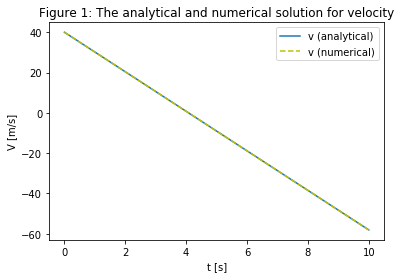

In [64]:
plt.figure(1)
plt.title('Figure 1: The analytical and numerical solution for velocity')
plt.xlabel('t [s]')
plt.ylabel('V [m/s]')
plt.plot(t, v_an, label='v (analytical)')
plt.plot(t, v_num, 'y--' ,label='v (numerical)')
plt.legend()

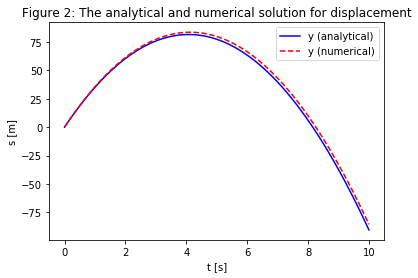

In [65]:
plt.figure(2)
plt.title('Figure 2: The analytical and numerical solution for displacement')
plt.xlabel('t [s]')
plt.ylabel('s [m]')
plt.plot(t, y_an, 'b',label='y (analytical)')
plt.plot(t, y_num, 'r--' ,label='y (numerical)')
plt.legend()

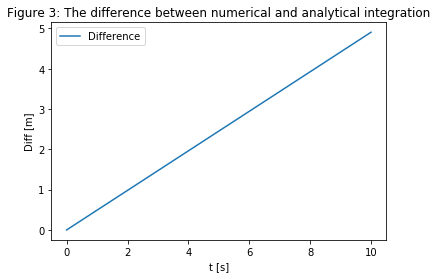

In [66]:
plt.title('Figure 3: The difference between numerical and analytical integration')
plt.xlabel('t [s]')
plt.ylabel('Diff [m]')
plt.plot(t, abs(y_num - y_an), label='Difference')
plt.legend()

It's possible to encounter a situation where the accelaration is dependent on the time. It's still possible in situations like this to apply Forward Euler integration. In cases like a function could be defined for accelaration making the code easier to read. Note that it is also possible to calculate the accelaration directly in the for loop. It comes down to personal preference.

This problem involves a function where the force is a function of time. The numerical solution will still be computed through forward Euler integration. The analytical solution can be found below.

$a = \frac{F}{m} = \frac{\sin(t)}{m}$

$v = \int a \,dt = \frac{1}{m} \int \sin(t) \,dt = \frac{-\cos(t)}{m} + C_1$

Since the initial velocity $v_0 = 0$:

$\frac{-\cos(0)}{m} + C_1 = 0 \Rightarrow C_1 = \frac{1}{m}$

$s = \int v\,dt = \int (\frac{-\cos(t)}{m} + C_1)\,dt = \frac{-\sin(t)}{m} + C_1\cdot t + C_2$

Since the initial displacement $s_0 = 0$:

$\frac{-\sin(0)}{m} + C_1 \cdot 0 + C_2 = 0 \Rightarrow C_2 = 0$

From this we can conclude that the velocity and displacement are:

$v(t) = \frac{1}{m} - \frac{-\cos(t)}{m} \,$ and $s(t) = \frac{t}{m} - \frac{-\sin(t)}{m}$

In [67]:
mass = 6 
t0 = 0
t1 = 10
dt = 0.1
v0 = 0
x0 = 0

t = np.linspace(t0, t1, 1 + round((t1-t0)/dt))
x_num = np.zeros(len(t))  
v_num = np.zeros(len(t))
x_num[0] = x0  #initial position 
v_num[0] = v0  #initial velocity

x_an = np.zeros(len(t))  
v_an = np.zeros(len(t))
x_an[0] = x0  #initial position 
v_an[0] = v0  #initial velocity

def acceleration(t):
    a = np.sin(t) / mass
    return a

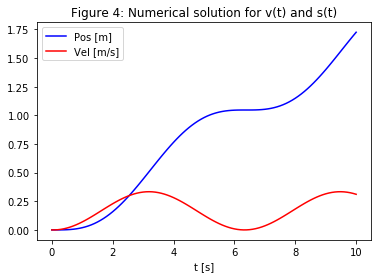

In [68]:
#Numerical Solution
for index in range(len(t)-1):
    a = acceleration(t[index])
    x_num[index+1] = x_num[index] + v_num[index]*dt
    v_num[index+1] = v_num[index] + a*dt

plt.title('Figure 4: Numerical solution for v(t) and s(t)')
plt.xlabel('t [s]')
plt.plot(t, x_num, 'b', label='Pos [m]')
plt.plot(t, v_num, 'r', label='Vel [m/s]')
plt.legend()

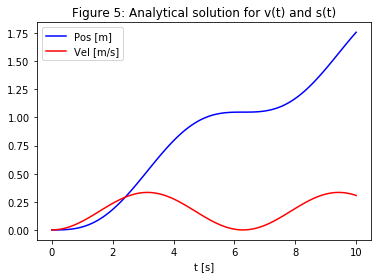

In [69]:
# Analytical Solution
for index in range(len(t)):
    v_an[index] = (1/mass) - (np.cos(t[index]))/mass
    x_an[index] = t[index]/mass - (np.sin(t[index]))/mass

plt.title('Figure 5: Analytical solution for v(t) and s(t)')
plt.xlabel('t [s]')
plt.plot(t, x_an, 'b', label='Pos [m]')
plt.plot(t, v_an, 'r', label='Vel [m/s]')
plt.legend()

Note that the difference between the analytical solution and numerical solution is cyclical in nature. This comes down to the fact that the analytical solution is an actual cosine wave as oppose to the numerical solution which computes each next point with a discrete step in time $\Delta t$.

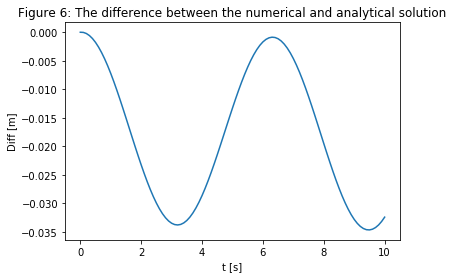

In [70]:
plt.title('Figure 6: The difference between the numerical and analytical solution')
plt.xlabel('t [s]')
plt.ylabel('Diff [m]')
plt.plot(t, x_num-x_an)